<a href="https://colab.research.google.com/github/JstnClmnt/NLP-News-Classification/blob/master/Filipino_News_Classification_Using_Bidirectional_Long_Short_Term_Memory_with_Attention_Mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [0]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import os

import numpy
from numpy.random import seed
seed(1)

In [0]:
import os
 
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = dirName+"/"+entry
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!unzip "/content/drive/Team Drives/NLP Project/Filipino_News_Classification/Filipino Dataset.zip"

Archive:  /content/drive/Team Drives/NLP Project/Filipino_News_Classification/Filipino Dataset.zip
   creating: Filipino Dataset/
  inflating: Filipino Dataset/1.txt  
  inflating: Filipino Dataset/10.txt  
  inflating: Filipino Dataset/100.txt  
  inflating: Filipino Dataset/1001.txt  
  inflating: Filipino Dataset/1002.txt  
  inflating: Filipino Dataset/1003.txt  
  inflating: Filipino Dataset/1004.txt  
  inflating: Filipino Dataset/1005.txt  
  inflating: Filipino Dataset/1006.txt  
  inflating: Filipino Dataset/1007.txt  
  inflating: Filipino Dataset/1008.txt  
  inflating: Filipino Dataset/1009.txt  
  inflating: Filipino Dataset/101.txt  
  inflating: Filipino Dataset/1010.txt  
  inflating: Filipino Dataset/1011.txt  
  inflating: Filipino Dataset/1012.txt  
  inflating: Filipino Dataset/1013.txt  
  inflating: Filipino Dataset/1014.txt  
  inflating: Filipino Dataset/1015.txt  
  inflating: Filipino Dataset/1016.txt  
  inflating: Filipino Dataset/1017.txt  
  inflating: Fil

In [0]:
import pandas as pd


dirName = 'Filipino Dataset';
    
# Get the list of all files in directory tree at given path
df_predata=pd.read_csv("/content/drive/Team Drives/NLP Project/Filipino_News_Classification/filipino.csv")
df_predata=df_predata[["Headline","Authors","File Number","Category"]]
df_predata=df_predata.rename(columns={'File Number':'file_number'}) 
#print(df_predata.head())
df=pd.DataFrame(columns=["Title","Description","Category"])
for row in df_predata.itertuples():
    file_name=str(row.file_number)+".txt"
    try:
        file1 = open(dirName+"/"+file_name,"r",encoding="utf8") 
    except:
        continue
    print("Reading "+file_name)
    sampleNews=file1.read().split("\n")
    newsDesc=""
    for strline in sampleNews[1:len(sampleNews)]:
        newsDesc+=strline
    dfsample=pd.DataFrame(columns=["Title","Description","Category"],data=[[row.Headline,newsDesc,row.Category]])
    df=df.append(dfsample)
df.head()

Reading 1.txt
Reading 2.txt
Reading 3.txt
Reading 4.txt
Reading 5.txt
Reading 7.txt
Reading 8.txt
Reading 9.txt
Reading 10.txt
Reading 11.txt
Reading 12.txt
Reading 15.txt
Reading 16.txt
Reading 19.txt
Reading 20.txt
Reading 21.txt
Reading 22.txt
Reading 23.txt
Reading 24.txt
Reading 25.txt
Reading 26.txt
Reading 27.txt
Reading 28.txt
Reading 29.txt
Reading 30.txt
Reading 31.txt
Reading 32.txt
Reading 33.txt
Reading 34.txt
Reading 35.txt
Reading 36.txt
Reading 37.txt
Reading 38.txt
Reading 39.txt
Reading 40.txt
Reading 41.txt
Reading 42.txt
Reading 43.txt
Reading 44.txt
Reading 45.txt
Reading 46.txt
Reading 47.txt
Reading 48.txt
Reading 49.txt
Reading 50.txt
Reading 51.txt
Reading 52.txt
Reading 53.txt
Reading 54.txt
Reading 55.txt
Reading 56.txt
Reading 57.txt
Reading 58.txt
Reading 59.txt
Reading 60.txt
Reading 61.txt
Reading 62.txt
Reading 63.txt
Reading 64.txt
Reading 65.txt
Reading 66.txt
Reading 67.txt
Reading 68.txt
Reading 69.txt
Reading 70.txt
Reading 71.txt
Reading 72.txt
Rea

,Title,Description,Category
0,2 nene kinakadena ng magulang sa Albay,"Sa mga larawang ibinigay sa ABS-CBN Bicol, mak...",Crime
0,Hustisya hiling sa pagkamatay ng 'napagkamalan...,Nahuli sa CCTV ang pamamaril ng isang suspek s...,Crime
0,MODUS: Mga batang babae pinaghuhubad kapalit n...,"Noong isang beses, sinabihan siya ng anak na m...",Crime
0,Duterte dumepensa sa ulat ng 'lumalagong yaman',"Sa isang talumpati noong Sabado, sinabi ni Dut...",Politics
0,Mga umuuwi para sa Semana Santa unti-unti nang...,"Sa panayam sa DZMM, sinabi ni Armand Reyes, op...",Vehicles


In [0]:
!ls

 drive	'Filipino Dataset'   sample_data


In [0]:
df=df.reset_index()
df=df.drop(list(df)[0], axis=1)
df["Description"].head()[0]

'Sa mga larawang ibinigay sa ABS-CBN Bicol, makikitang naglalaro ang magkapatid na 11 at 12 anyos pero nakakadena ang mga ito. Ayon sa nagbigay ng retrato, mag-iisang buwan na umano itong ginagawa sa mga bata. Nang puntahan ng Philippine National Police Women and Children\'s Protection Desk (WCPD) ngayong Miyerkoles ang bahay ng mga biktima, umamin umano ang ina na kinakadena ang magkakapatid ng kanilang ama. Katuwiran ng ina na madalas umanong gumagala ang dalawang bata kaya kinakadena sila, pero nakakapaglaro naman sila sa labas ng bahay. Nasasangkot din umano sa pagnanakaw ang magkakapatid. Dagdag pa ng ina na hindi rin daw siya sigurado kung magbabago pa ang kaniyang mga anak.Pero iginiit ng ni Tabaco WCPD chief Police Capt. Maria Theresa Berdin, labag sa batas ang ginawa ng mga magulang. "Very obvious naman na hindi tama na ikadena natin ang ating mga anak dahil lang sa rason na sutil or madalas umalis ng bahay dahil alam naman natin na ang kadena hindi akma sa tao," aniya. Hindi 

In [0]:
df["Category"]=df["Category"].replace("Vehicle", "Vehicles")
df["Category"]=df["Category"].replace("Business ", "Business")
categories=df["Category"].unique().tolist()
cat_dict=dict(zip(categories, range(0,len((categories)))))
print(cat_dict)
for x in categories:
    print(x+": "+str(len(df[df["Category"]==x])))
df["Category"]=df['Category'].map(cat_dict, na_action='ignore')

{'Crime': 0, 'Politics': 1, 'Vehicles': 2, 'Business': 3, 'Entertainment': 4}
Crime: 232
Politics: 250
Vehicles: 207
Business: 248
Entertainment: 250


In [0]:
df['Description'] = df['Description'].str.replace("[^a-zA-Z#]", " ")
df=df.dropna()
df["Description"].head()[0]

'Sa mga larawang ibinigay sa ABS CBN Bicol  makikitang naglalaro ang magkapatid na    at    anyos pero nakakadena ang mga ito  Ayon sa nagbigay ng retrato  mag iisang buwan na umano itong ginagawa sa mga bata  Nang puntahan ng Philippine National Police Women and Children s Protection Desk  WCPD  ngayong Miyerkoles ang bahay ng mga biktima  umamin umano ang ina na kinakadena ang magkakapatid ng kanilang ama  Katuwiran ng ina na madalas umanong gumagala ang dalawang bata kaya kinakadena sila  pero nakakapaglaro naman sila sa labas ng bahay  Nasasangkot din umano sa pagnanakaw ang magkakapatid  Dagdag pa ng ina na hindi rin daw siya sigurado kung magbabago pa ang kaniyang mga anak Pero iginiit ng ni Tabaco WCPD chief Police Capt  Maria Theresa Berdin  labag sa batas ang ginawa ng mga magulang   Very obvious naman na hindi tama na ikadena natin ang ating mga anak dahil lang sa rason na sutil or madalas umalis ng bahay dahil alam naman natin na ang kadena hindi akma sa tao   aniya  Hindi m

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["Description"], df["Category"], test_size=0.20, random_state=42)

train_sum=0
for x in categories:
    print(x+": "+str(len(y_train[y_train==cat_dict[x]])))
    train_sum+=len(y_train[y_train==cat_dict[x]])
print("Total Training Data: "+str(train_sum)+"\n")

test_sum=0
for x in categories:
    print(x+": "+str(len(y_test[y_test==cat_dict[x]])))
    test_sum+=len(y_test[y_test==cat_dict[x]])
print("Total Test Data: "+str(test_sum))

Crime: 184
Politics: 202
Vehicles: 162
Business: 203
Entertainment: 198
Total Training Data: 949

Crime: 48
Politics: 48
Vehicles: 45
Business: 45
Entertainment: 52
Total Test Data: 238


In [0]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

X_train_notcleaned=[word_tokenize(i) for i in X_train]
y_train=y_train.values
X_test_notcleaned=[word_tokenize(i) for i in X_test]
y_test=y_test.values

print(X_train_notcleaned[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Ayon', 'kay', 'Police', 'Captain', 'Samuel', 'Bascon', 'hepe', 'ng', 'Tupi', 'Municipal', 'Police', 'Station', 'pasado', 'ala', 'ng', 'madaling', 'araw', 'nang', 'pumasok', 'si', 'Reylan', 'Solaiman', 'Katag', 'sa', 'isang', 'Community', 'Police', 'Assistance', 'Center', 'Compac', 'Sinira', 'umano', 'ng', 'suspek', 'ang', 'kawayang', 'bakod', 'sa', 'likod', 'ng', 'opisina', 'upang', 'makapasok', 'sabi', 'ni', 'Bascon', 'Sinita', 'ng', 'mga', 'naka', 'duty', 'na', 'pulis', 'si', 'Katag', 'pero', 'sa', 'halip', 'na', 'sabihin', 'ang', 'pakay', 'ay', 'nagpaputok', 'umano', 'ng', 'M', 'rifle', 'ang', 'suspek', 'kaya', 't', 'binaril', 'din', 'ng', 'mga', 'pulis', 'aniya', 'Napag', 'alaman', 'din', 'ng', 'mga', 'pulis', 'na', 'napatay', 'sa', 'isang', 'illegal', 'firearms', 'at', 'illegal', 'drug', 'raid', 'operations', 'ang', 'tiyuhin', 'nito', 'noong', 'nakaraang', 'taon', 'sa', 'Bar

In [0]:
def remove_stop_words(s):
    s_cleaned=[]
    f = open('/content/drive/Team Drives/NLP Project/Filipino_News_Classification/tagalog_stop_words.csv','r')
    d = f.read()
    stop_words_filipino = d.split('\n')
    for w in s:
        if w.lower() not in stopwords.words("english") and len(w)>=3 and w.lower() not in stop_words_filipino:
            s_cleaned.append(w)
 
    return s_cleaned

In [0]:
from nltk.corpus import stopwords
nltk.download("stopwords")
import multiprocessing as mp


X_train,X_test=[],[]

for x in X_train_notcleaned:
  X_train.append(remove_stop_words(x))


for x in X_test_notcleaned:
  X_test.append(remove_stop_words(x))

print(X_train[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Ayon', 'kay', 'Police', 'Captain', 'Samuel', 'Bascon', 'hepe', 'Tupi', 'Municipal', 'Police', 'Station', 'pasado', 'ala', 'madaling', 'araw', 'pumasok', 'Reylan', 'Solaiman', 'Katag', 'isang', 'Community', 'Police', 'Assistance', 'Center', 'Compac', 'Sinira', 'umano', 'suspek', 'kawayang', 'bakod', 'likod', 'opisina', 'upang', 'makapasok', 'sabi', 'Bascon', 'Sinita', 'naka', 'duty', 'pulis', 'Katag', 'halip', 'sabihin', 'pakay', 'nagpaputok', 'umano', 'rifle', 'suspek', 'binaril', 'pulis', 'aniya', 'Napag', 'alaman', 'pulis', 'napatay', 'isang', 'illegal', 'firearms', 'illegal', 'drug', 'raid', 'operations', 'tiyuhin', 'nito', 'noong', 'nakaraang', 'taon', 'Barangay', 'Polonuling', 'makapaniwala', 'pamilya', 'Katag', 'alegasyon', 'pulis', 'laban', 'Nakahimlay', 'bangkay', 'lalaki', 'punerarya', 'bayan', 'Patuloy', 'ginagawang', 'imbestigasyon', 'pulisya', 'upang', 'malaman',

In [0]:
words = set([])
for s in X_train:
    for w in s:
        words.add(w.lower())
word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs

In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tl.300.vec.gz

--2019-05-06 18:10:15--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tl.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 423421446 (404M) [binary/octet-stream]
Saving to: ‘cc.tl.300.vec.gz’

cc.tl.300.vec.gz    100%[===================>] 403.81M  24.8MB/s    in 29s     

2019-05-06 18:10:44 (14.1 MB/s) - ‘cc.tl.300.vec.gz’ saved [423421446/423421446]



In [0]:
!gunzip cc.tl.300.vec.gz

In [0]:
import numpy as np
from gensim.models import KeyedVectors

embeddings_index=KeyedVectors.load_word2vec_format('cc.tl.300.vec')

In [0]:
train_sentences_X, test_sentences_X = [], []

EMB_DIM=300
num_words=len(word2index)+1
print("Number of Words:"+str(num_words))

for s in X_train:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)
    
for s in X_test:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)


MAX_LENGTH = len(max(train_sentences_X, key=len))
print("Max Length: "+str(MAX_LENGTH))  # 271

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
#y_train=to_categorical(y_train)
#y_test=to_categorical(y_test)
print(train_sentences_X[0])
print(y_train[0])

Number of Words:20796
Max Length: 2012
[13407  9922 12430 ...     0     0     0]
0


In [0]:
embedding_matrix=np.zeros((num_words,EMB_DIM))
#print(word2index)
for word,i in word2index.items():
    if i>num_words:
        continue
    try:
        embedding_vector=embeddings_index[word]
    except:
        continue
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [0]:
from tensorflow.keras.layers import LSTM,Permute,Dense,Lambda,RepeatVector
SINGLE_ATTENTION_VECTOR = False
TIME_STEPS=MAX_LENGTH

def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = EMB_DIM
    a = Permute((2, 1))(inputs)
    a = Dense(TIME_STEPS, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

In [0]:
from tensorflow.keras.callbacks import TensorBoard

class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./Graph', **kwargs):
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, 'training')
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)

        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, 'validation')

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        logs = logs or {}
        val_logs = {k.replace('val_', ''): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
        self.val_writer.flush()

        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

In [0]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, CuDNNLSTM,LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation,Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import Constant
import numpy as np
from tensorflow.keras.utils import plot_model

model_lstm=Sequential() 
embedding_layer=Embedding(num_words,EMB_DIM,embeddings_initializer=Constant(embedding_matrix),input_length=MAX_LENGTH,trainable=False)
#embedding_layer=Embedding(num_words, 300,mask_zero=True)
inputs=InputLayer(input_shape=(MAX_LENGTH, ))
model_lstm.add(inputs)
model_lstm.add(embedding_layer)
model_lstm.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Bidirectional(CuDNNLSTM(128)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(len(np.unique(y_train)),activation="softmax"))
model_lstm.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.001),    
              metrics=["accuracy"])

print(model_lstm.summary())
plot_model(model_lstm, to_file='model_lstm_filipino.png')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2012, 300)         6238800   
_________________________________________________________________
bidirectional (Bidirectional (None, 2012, 256)         440320    
_________________________________________________________________
dropout (Dropout)            (None, 2012, 256)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2012, 256)         395264    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2012, 256)         0         
_________________________________________________________________
bidirectional_2 (Bidi

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

es_valacc = EarlyStopping(monitor='val_acc', mode='max',verbose=1,patience=3,min_delta=0.003)
es_loss = EarlyStopping(monitor='loss', mode='min',verbose=1,patience=5)
save = ModelCheckpoint('best_model_lstm_fil.hdf5', save_best_only=True, monitor='val_acc', mode='max')
history_lstm=model_lstm.fit(train_sentences_X, y_train, validation_data=(test_sentences_X,y_test), batch_size=64,epochs=40,callbacks=[save,es_loss,es_valacc,TrainValTensorBoard(write_graph=True,log_dir='./Graph_LSTM_Filipino')])

Train on 949 samples, validate on 238 samples
Epoch 1/40
949/949 [==============================] - 24s 25ms/sample - loss: 1.4065 - acc: 0.3920 - val_loss: 0.9630 - val_acc: 0.5210
Epoch 2/40
949/949 [==============================] - 18s 19ms/sample - loss: 0.8683 - acc: 0.6249 - val_loss: 0.7368 - val_acc: 0.7143
Epoch 3/40
949/949 [==============================] - 18s 19ms/sample - loss: 0.6679 - acc: 0.7545 - val_loss: 0.5927 - val_acc: 0.8067
Epoch 4/40
949/949 [==============================] - 18s 19ms/sample - loss: 0.5929 - acc: 0.7903 - val_loss: 0.5542 - val_acc: 0.8109
Epoch 5/40
949/949 [==============================] - 18s 19ms/sample - loss: 0.4839 - acc: 0.8451 - val_loss: 0.5025 - val_acc: 0.8403
Epoch 6/40
949/949 [==============================] - 13s 13ms/sample - loss: 0.4339 - acc: 0.8514 - val_loss: 0.5443 - val_acc: 0.8025
Epoch 7/40
949/949 [==============================] - 18s 19ms/sample - loss: 0.4239 - acc: 0.8577 - val_loss: 0.4578 - val_acc: 0.8487
Ep

In [0]:
#model_lstm.save("LSTM.h5")
scores = model_lstm.evaluate(test_sentences_X,y_test)
print(model_lstm.metrics_names)
print(scores)

238/238 [==============================] - 2s 8ms/sample - loss: 0.5301 - acc: 0.8361
['loss', 'acc']
[0.5301364404814584, 0.83613443]


In [0]:
# Save the weights
#model_lstm.save_model('lstm.hdf5')
tf.keras.models.save_model(model_lstm,"lstm_Filipino.hdf5")
del model_lstm

In [0]:
model_lstm=keras.models.load_model("best_model_lstm_fil.hdf5")
scores = model_lstm.evaluate(test_sentences_X,y_test)
print(model_lstm.metrics_names)
print(scores)

238/238 [==============================] - 2s 9ms/sample - loss: 0.4578 - acc: 0.8487
['loss', 'acc']
[0.45778891694645923, 0.8487395]


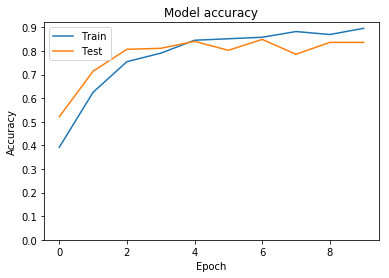

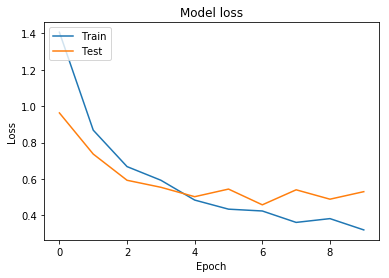

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure()
plt.plot(history_lstm.history['acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.yticks(np.arange(0,1,step=0.1))
plt.savefig("acc_lstm_fil.png")

plt.figure( )
# Plot training & validation loss values
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss_lstm_fil.png")

In [0]:
from tensorflow.keras.layers import concatenate,add,dot,multiply, Dense,CuDNNLSTM, LSTM, InputLayer, Bidirectional, Embedding, Activation,Dropout,Input,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import plot_model


inputs = Input(shape=(MAX_LENGTH,))
embedding_layer=Embedding(num_words,EMB_DIM,embeddings_initializer=Constant(embedding_matrix),input_length=MAX_LENGTH,trainable=False)
attention_mul = embedding_layer(inputs)
attention_mul = Bidirectional(CuDNNLSTM(256,return_sequences=True))(attention_mul)
attention_mul=Dropout(0.5)(attention_mul)
attention_mul = Bidirectional(CuDNNLSTM(256,return_sequences=True))(attention_mul)
attention_mul=Dropout(0.5)(attention_mul)
attention_mul = Bidirectional(CuDNNLSTM(256,return_sequences=True))(attention_mul)
attention_mul = attention_3d_block(attention_mul)
attention_mul=Dropout(0.5)(attention_mul)
attention_mul = Flatten()(attention_mul)
output = Dense(len(np.unique(y_train)),activation="softmax")(attention_mul)
model = tf.keras.Model(inputs=[inputs], outputs=output)
opt = Adam(0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,    
              metrics=["accuracy"])
print(model.summary())
plot_model(model, to_file='model_attention_Filipino.png')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 2012)         0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 2012, 300)    6238800     input_11[0][0]                   
__________________________________________________________________________________________________
bidirectional_30 (Bidirectional (None, 2012, 512)    1142784     embedding_10[0][0]               
__________________________________________________________________________________________________
dropout_30 (Dropout)            (None, 2012, 512)    0           bidirectional_30[0][0]           
__________________________________________________________________________________________________
bidirectio

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

es_valacc = EarlyStopping(monitor='val_acc', mode='max',verbose=1,patience=5,min_delta=0.003)
es_loss = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=5)
save = ModelCheckpoint('best_model_attention_fil.hdf5', save_best_only=True, monitor='val_acc', mode='max')
history=model.fit(train_sentences_X, y_train, validation_data=(test_sentences_X,y_test), batch_size=64,epochs=100,callbacks=[save,es_loss,TrainValTensorBoard(write_graph=True,log_dir='./Graph_Filipino')])

Train on 949 samples, validate on 238 samples
Epoch 1/100
949/949 [==============================] - 50s 53ms/sample - loss: 1.6092 - acc: 0.2234 - val_loss: 1.6079 - val_acc: 0.2227
Epoch 2/100
949/949 [==============================] - 39s 41ms/sample - loss: 1.5547 - acc: 0.2929 - val_loss: 1.5531 - val_acc: 0.2941
Epoch 3/100
949/949 [==============================] - 38s 40ms/sample - loss: 1.2995 - acc: 0.3772 - val_loss: 1.2018 - val_acc: 0.4202
Epoch 4/100
949/949 [==============================] - 32s 34ms/sample - loss: 1.2106 - acc: 0.4320 - val_loss: 1.2082 - val_acc: 0.4160
Epoch 5/100
949/949 [==============================] - 38s 40ms/sample - loss: 1.2009 - acc: 0.4226 - val_loss: 1.2454 - val_acc: 0.4538
Epoch 6/100
949/949 [==============================] - 32s 34ms/sample - loss: 1.2226 - acc: 0.4405 - val_loss: 1.1745 - val_acc: 0.4538
Epoch 7/100
949/949 [==============================] - 32s 34ms/sample - loss: 1.2132 - acc: 0.4826 - val_loss: 1.9627 - val_acc: 0.

In [0]:
tf.keras.models.save_model(model,"attention_fil.hdf5")
del model

In [0]:
model=load_model("best_model_attention_fil.hdf5")
scores = model.evaluate(test_sentences_X,y_test)
print(model.metrics_names)
print(scores)

238/238 [==============================] - 3s 13ms/sample - loss: 0.5885 - acc: 0.7941
['loss', 'acc']
[0.5885168714683597, 0.7941176]


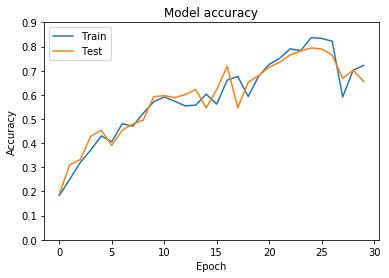

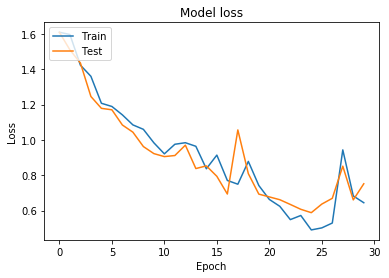

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.yticks(np.arange(0,1,step=0.1))
plt.savefig("acc_attention_fil.png")

plt.figure( )
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss_attention_fil.png")

In [0]:
import tensorflow.keras.backend as K
import numpy as np


def get_activations(model, inputs, print_shape_only=False, layer_name=None):
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions
    layer_outputs = [func([inputs, 1.])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
    return activations


In [0]:
import nltk
from nltk.corpus import stopwords

def interpret_attention(input_text,model,truelabel=None):
  attention_vectors = []
  print("Input Text:\n"+input_text)
  input_text=input_text.replace("[^a-zA-Z#]", " ")
  input_text=word_tokenize(input_text)
  input_text_cleaned=[]
  input_text_cleaned=remove_stop_words(input_text)
  input_text_index=[]
  for w in input_text_cleaned:
      try:
          input_text_index.append(word2index[w.lower()])
      except KeyError:
          input_text_index.append(word2index['-OOV-'])
  input_text_pad=pad_sequences([input_text_index], maxlen=MAX_LENGTH, padding='post')

  predictions=model.predict(input_text_pad)
  actual_pred=""
  index_max=0
  for n in range(len(predictions[0])):
    if predictions[0][n]>predictions[0][index_max]:
      index_max=n
  for n in cat_dict.keys():
    if cat_dict[n]==index_max:
      actual_pred=n
      break
    
  if truelabel is not None:
    for n in cat_dict.keys():
      if cat_dict[n]==truelabel:
        truelabel=n
        break
    print("True Value: "+str(truelabel))
  print("Prediction: "+str(actual_pred))
    
  attention_vector = np.mean(get_activations(model,input_text_pad,print_shape_only=True,layer_name='attention_vec')[0], axis=2).squeeze()
  assert (np.sum(attention_vector) - 1.0) < 1e-5

  words_index=sorted(range(len(attention_vector)), key=lambda i: attention_vector[i])[-5:]
  top_words=dict()
  for x in words_index:
      if x<len(input_text_cleaned):
          top_words[input_text_cleaned[x]]=attention_vector[x]
  print(top_words)

  import matplotlib.pyplot as plt

  plt.figure()
  plt.bar(range(len(top_words)),list(top_words.values()),align="center")
  plt.xticks(range(len(top_words)),list(top_words.keys()))
  plt.show()

Input Text:
Bumalik ang mga stock sa kanilang mga paa pagkatapos ng dalawang sesyon ng pagkalugi sa maagang kalakalan Martes habang ang Sensex ay nakuhang muli ng higit sa 138 na punto na hinimok ng isang sariwang pag-ikot ng pagbili sa gitna ng isang kalakasan sa iba pang mga merkado sa Asya. Ang benchmark, na sumuko sa 478.85 puntos sa nakaraang dalawang sesyon, ay nakapagpalakas ng mas mataas na 138.46 puntos, o 0.48 porsiyento sa 28,432.74 sa lahat ng mga indeks ng sektor na pinangungunahan ng realty, mga consumer durables at pangangalagang pangkalusugan na sumusuporta sa pagbawi, umaabot hanggang 0.92 porsyento. Ang 50-share NSE Nifty ay bumaba ng mas mataas na 45.45 puntos, o 0.52 porsiyento, sa 8,768.50.
Prediction: Business
{'kalakalan': 0.00036140048, 'Bumalik': 0.00044013292, 'pagbili': 0.2619853, 'paa': 0.4537036}


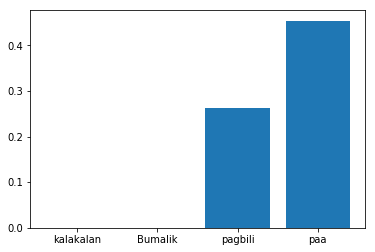

In [0]:
attention_vectors = []

sample_text="Bumalik ang mga stock sa kanilang mga paa pagkatapos ng dalawang sesyon ng pagkalugi sa maagang kalakalan Martes habang ang Sensex ay nakuhang muli ng higit sa 138 na punto na hinimok ng isang sariwang pag-ikot ng pagbili sa gitna ng isang kalakasan sa iba pang mga merkado sa Asya. Ang benchmark, na sumuko sa 478.85 puntos sa nakaraang dalawang sesyon, ay nakapagpalakas ng mas mataas na 138.46 puntos, o 0.48 porsiyento sa 28,432.74 sa lahat ng mga indeks ng sektor na pinangungunahan ng realty, mga consumer durables at pangangalagang pangkalusugan na sumusuporta sa pagbawi, umaabot hanggang 0.92 porsyento. Ang 50-share NSE Nifty ay bumaba ng mas mataas na 45.45 puntos, o 0.52 porsiyento, sa 8,768.50." 
interpret_attention(sample_text,model)

Input Text:
Sa mga larawang ibinigay sa ABS CBN Bicol  makikitang naglalaro ang magkapatid na    at    anyos pero nakakadena ang mga ito  Ayon sa nagbigay ng retrato  mag iisang buwan na umano itong ginagawa sa mga bata  Nang puntahan ng Philippine National Police Women and Children s Protection Desk  WCPD  ngayong Miyerkoles ang bahay ng mga biktima  umamin umano ang ina na kinakadena ang magkakapatid ng kanilang ama  Katuwiran ng ina na madalas umanong gumagala ang dalawang bata kaya kinakadena sila  pero nakakapaglaro naman sila sa labas ng bahay  Nasasangkot din umano sa pagnanakaw ang magkakapatid  Dagdag pa ng ina na hindi rin daw siya sigurado kung magbabago pa ang kaniyang mga anak Pero iginiit ng ni Tabaco WCPD chief Police Capt  Maria Theresa Berdin  labag sa batas ang ginawa ng mga magulang   Very obvious naman na hindi tama na ikadena natin ang ating mga anak dahil lang sa rason na sutil or madalas umalis ng bahay dahil alam naman natin na ang kadena hindi akma sa tao   ani

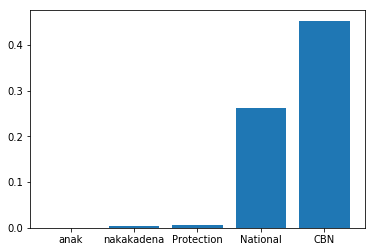

Input Text:
Nahuli sa CCTV ang pamamaril ng isang suspek sa biktimang si alyas  Vilma  na bumili lang ng almusal noong madaling araw ng Abril    Ayon sa kaanak  hindi sila makapaniwalang dito hahantong ang buhay ni Vilma  na inilarawan niya na mabait at malambing Hiling ng pamilya na mabigyan ng katarungan ang pagkamatay ni Vilma  Pangalawa sa limang magkakapatid si Vilma  Bagaman tumigil sa pag aaral nais niyang makapagtrabaho para makatulong sa pamilya  Palakaibigan din daw ito  Dagdag niya  walang kalaban laban at posibleng napagkamalan lang ang dalaga   Gusto namin na mabigyan ng katarungan  Kasi hindi naman din kami matatahimik eh  Makakatulog ba kami nang ganiyan  Walang kalaban laban  Napagbintangan lang  Napagkamalan  na iyong hinahanap eh kamukha niya   ayon sa kaanak ng biktima  Mistaken identity ang lumalabas sa imbestigasyon ng pulisya sa pamamaril  Aminado umano ang suspek na napagkamalan ang biktimaItinuturo ang isang alyas Juanabee bilang target ng mga suspek na namaril 

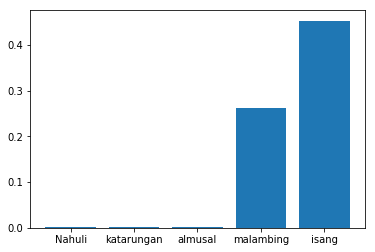

Input Text:
Sa isang talumpati noong Sabado  sinabi ni Duterte na may yaman siya dahil sa ina  Hoy   yong mga dilaw  all the time I was with my mother  maski nung mayor na ako  ang nagpapakain sa  kin nanay ko   sabi ni Duterte  Ang nanay ko nag iwan ng pera sa  kin  pero kung magkano bakit ko sabihin sa inyo   anang pangulo  For the longest time I was living with my mother  libre lahat  pati mura   aniya Sa ulat ng PCIJ  ipinakita ang Statement of Assets  Liabilities  and Net Worth  SALN  ng mga Duterte Sa loob ng    taon mula       halos nag triple ang yaman ng pangulo na pumalo sa P      milyon Higit triple naman ang net worth ni dating Davao City Vice Mayor Paolo Duterte at higit anim na doble ang kay Davao City Mayor Sara Duterte Ito ay kahit mababa ang pasahod sa gobyerno at hindi halos gumalaw ang kita nila sa mga kompanyang kinabibilangan nila Ayon pa sa ulat  hindi lahat ng detalye ng ari arian ay nasa SALN ng pangulo Sinagot din ni Duterte ang isa pang ulat ng PCIJ kaugnay ng

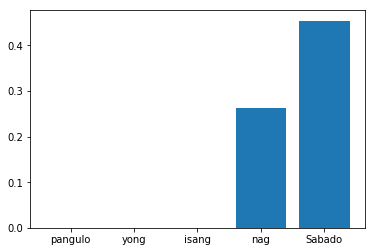

Input Text:
Ayon kay Presidential Spokesperson Salvador Panelo  walang babaguhin sa iskedyul ng Pangulo  Marami kasi siyang binangga  Mga komunista  rebelde  drug lord kaya natural lang na magkaroon  ng threat     Itong presidenteng ito wala naman siyang pakialam kahit barilin pa siya   sabi ni Panelo sa isang panayam sa DZMM nitong Huwebes  Sinabi ang pahayag sa gitna ng pagpapaigting sa seguridad sa mga pinupuntahang pagtitipon ni Duterte  Noong Martes  pinalibutan ang Pangulo ng isang bullet proof glass habang nagtatalumpati sa isang campaign rally sa Malabon City  Samantala  sinabi naman ng Philippine National Police  PNP  na wala pa silang natatanggap na lehitimong banta sa buhay ng Pangulo   There is no validated death threat upon the life of  Duterte   However  the PNP will always be vigilant and not let its guard down in providing area and perimeter security whenever he is out for speaking engagements  visitations or inspections   sabi ni Police Col  Bernard Banac  tagapagsalit

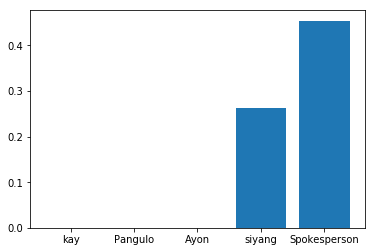

Input Text:
Sa panayam sa DZMM  sinabi ni Armand Reyes  operations supervisor ng Araneta Bus Station at Bus Port na may nag uuwian na at sinasamantala ang holiday ngayong araw  Aniya  pumalo na sa halos       ang pasahero sa Araneta Bus Station at Bus port hanggang kaninang alas   ng umaga  Dagdag ni Reyes na aasahan ang pinakamaraming bilang ng pasahero sa Abril     Biyernes   na huling weekday bago mag Semana Santa  Dinamihan na rin nila ang seguridad sa lugar   Dinagdagan na po natin ang mga security personnel natin may mga augmentation na po tayo together with mga kapulisan natin dadami rin po  yan   aniya  Manipis pa aniya ang bilang ng mga bumibiyahe kaya inanyayahan na ni Reyes ang ibang pasahero na mag advanced booking at mag online booking para iwas aberya  Magdamagan ang operasyon ng Araneta Bus Station kung saan naka terminal ang mga ordinary bus  Habang alas   ng madaling araw hanggang alas    ng gabi naman ang operasyon ng Araneta Bus Port kung saan naka terminal ang mga a

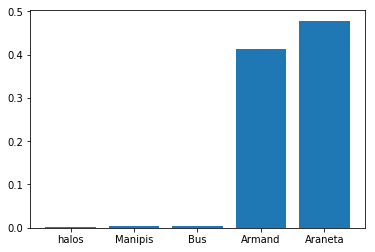

Input Text:
Isinara ang bahagi ng Magallanes Interchange mula Maynila papuntang EDSA northbound sa Cubao  Quezon City dahil madalas magkaroon ng banggaan doon  ayon sa MMDA Bahagi ng Magallanes Interchange isinara sa mga motoristaPero sa kabila ng pagkaway ng mga MMDA enforcer sa mga motorista para ituro ang isinarang kalsada  nalito pa rin ang mga motorista Idinaing din ng mga motorista na mapapalayo ang kanilang biyahe sa pagsara  Lalayo po kami    ang laking kawalan sa kita namin  yon   anang taxi driver na si Noel Pagulong  Nalito ako  akala ko kasi may daan kanina   anang motorcycle rider na si Justin Absolig Noong       umabot sa higit     ang naitalang banggaan sa lugar habang     naman noong      ALTERNATIBONG RUTAMula Maynila  maaaring kumaliwa ang mga motorista papuntang Buendia para makarating sa EDSA Maaari rin mag U turn at dumaan sa Yulo Plaza  kumanan sa Pasong Tamo at mag U turn sa ilalim ng Magallanes Interchange Maaari ring dumeretso sa Magallanes Interchange  dumaan 

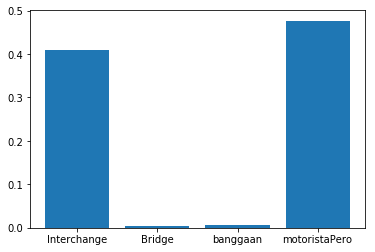

Input Text:
Presyo ng gulay sa Munoz MarketTalong   P   kilo  dating P   kilo  Carrots   P    kilo  dating P   kilo  Bawang   P    kilo  dating P    kilo  Ampalaya   P    kilo  dating P   kilo  Sayote   P   kilo  dating P   kilo  Bumaba naman sa P    kada kilo ang bell pepper mula P    Samantala  bumaba ang presyo ng ilang klase ng lokal na bigas sa nasabing palengke Well milled   P   kilo  dating P   kilo  Regular milled   P   kilo  dating P   kilo  Tumaas naman ang presyo ng galunggong na P    kada kilo ngayon mula P    
True Value: Business
Prediction: Business
{'dating': 0.00033481728, 'Presyo': 0.00045312475, 'kilo': 0.26198512, 'MarketTalong': 0.45376945}


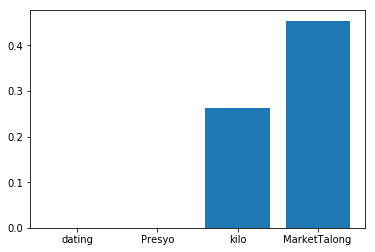

Input Text:
Presyo ng gulay sa Munoz MarketTalong   P   kilo  dating P   kilo  Carrots   P    kilo  dating P   kilo  Bawang   P    kilo  dating P    kilo  Ampalaya   P    kilo  dating P   kilo  Sayote   P   kilo  dating P   kilo  Bumaba naman sa P    kada kilo ang bell pepper mula P    Samantala  bumaba ang presyo ng ilang klase ng lokal na bigas sa nasabing palengke Well milled   P   kilo  dating P   kilo  Regular milled   P   kilo  dating P   kilo  Tumaas naman ang presyo ng galunggong na P    kada kilo ngayon mula P    
True Value: Business
Prediction: Business
{'dating': 0.00033653434, 'Presyo': 0.0004368352, 'kilo': 0.2620521, 'MarketTalong': 0.45378208}


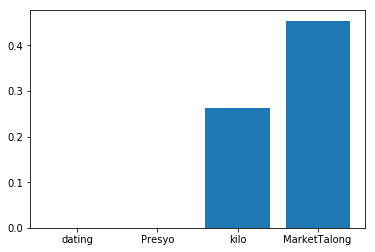

Input Text:
 
True Value: Entertainment
Prediction: Vehicles
{}


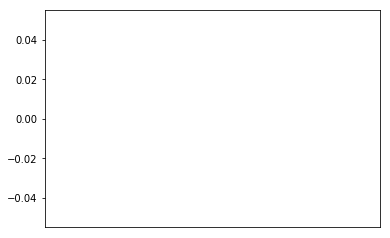

Input Text:
Sa murang edad  naranasan ni Canda  na tubong Cebu  ang labis na pangungutya dahil sa kaniyang deformity  I was born with cleft palate so naapektuhan  yung pagsasalita ko    I ve been bullied since I was a kid  Sobrang hirap kasi di ako accepted ng mga tao kasi I m different physically   sabi niya Sari saring paraan ang sinubukan ni Canda upang maging normal sa paningin ng nakararami   Nung bata ako kumukuha ako ng bubble gum tapos nilalagay ko sa upper palate para maintindihan  yung pagsasalita ko pero hindi pa rin nag work   pag alala niya  Dahil dito  humuhugot na lamang ng lakas sa ina ang binata  Payo ng ina   just pray and forgive them    DANCING IS MY LANGUAGE Dahil sa mga karanasan sa buhay  humanap si Canda ng paraan upang maparating ang nais sabihin nang hindi gumagamit ng salita  Ang ginawa ko naghanap ako ng talent na hindi kailangan magsalita   aniya Dito niya napagtanto ang isang talento na babago sa takbo ng kaniyang buhay  Dancing talaga is my language  Mula

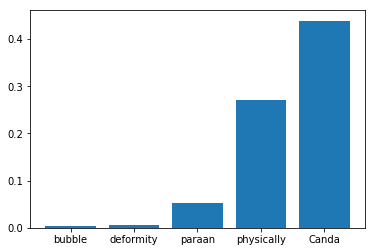

In [0]:
for cat in cat_dict.keys():
  for x in range(2):
    test_input=df[df["Category"]==cat_dict[cat]].iloc[x]
    interpret_attention(test_input["Description"],model,truelabel=test_input["Category"])